# Does tag imply like?

## Init

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import networkx as nx

In [2]:
data_dir = "../../data/"

df_user_artists = pd.read_table(f"{data_dir}hetrec2011-lastfm-2k/user_artists.dat")
df_tagged = pd.read_table(f"{data_dir}hetrec2011-lastfm-2k/user_taggedartists-timestamps.dat")
df_tags = pd.read_table(f"{data_dir}hetrec2011-lastfm-2k/tags.dat")

In [3]:
df_user_artists.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [4]:
df_tagged.head()

,userID,artistID,tagID,timestamp
0,2,52,13,1238536800000
1,2,52,15,1238536800000
2,2,52,18,1238536800000
3,2,52,21,1238536800000
4,2,52,41,1238536800000


## Prepare data

In [5]:
df_tagged = df_tagged.drop_duplicates(subset=["userID", "artistID"])

In [6]:
df = pd.merge(
    df_user_artists,
    df_tagged,
    on=["userID", "artistID"],
    how="left"
)

In [7]:
# If timestamp is not None => user tagged author (=> user likes author ?)
df["like"] = df["timestamp"].notna()

## EDA

In [8]:
df.groupby("like")["weight"].describe()

,count,mean,std,min,25%,50%,75%,max
like,,,,,,,,
False,72169.0,550.439191,1908.206989,1.0,94.0,230.0,529.0,257978.0
True,20665.0,1425.566368,7064.561155,1.0,172.0,411.0,1014.0,352698.0


In [9]:
def plot_hist(df, bins):
    ax = sns.histplot(
        data=df, 
        x="weight",
        hue="like", 
        stat="probability",
        common_norm=False,
        bins=bins
    )
    ax.set_yscale("log")

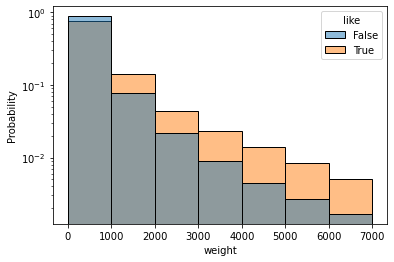

In [10]:
# Up to 99 percentile

bins = np.arange(0, df["weight"].quantile(0.99), 1000)
plot_hist(df, bins)

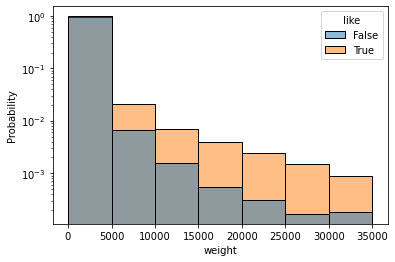

In [11]:
# Up to 99.9 percentile

bins = np.arange(0, df["weight"].quantile(0.999), 5000)
plot_hist(df, bins)

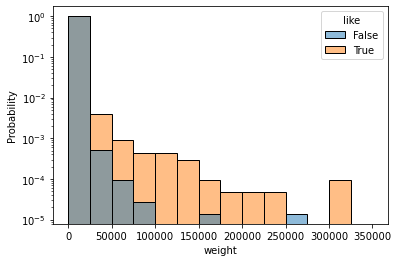

In [12]:
# Up to max

bins = np.arange(0, df["weight"].max(), 25000)
plot_hist(df, bins)